In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from IPython.display import display

2.3) Calculate the root-mean-square end-to-end distance for polyethylene with 
M =  lo7 g m o l ~  in an ideal conformation with C, = 7.4. Compare the 
end-to-end distance with the contour length of this polymer. 


In [2]:
##end to end
Mtot = 1e7
Mmon = 12*2 + 4
Cinf = 7.4
n = int(Mtot/Mmon)*2 #multiply by two because each monomer has 2 backbone atoms
l = 1.54 #bond length vector between backbone atoms as given in textbook
R2 = Cinf*n*(l**2) #as given from the textbook
print(f"<RMS end to end distance>^(1/2) ~ {np.sqrt(R2)} ang")

##contour length
theta = 68*(np.pi/180) #taken from textbook and converted to radians
Contour_length =n*l*np.cos(theta/2)
print(f"Contour length ~ {Contour_length} ang")


<RMS end to end distance>^(1/2) ~ 3540.560677994377 ang
Contour length ~ 911939.1411513543 ang


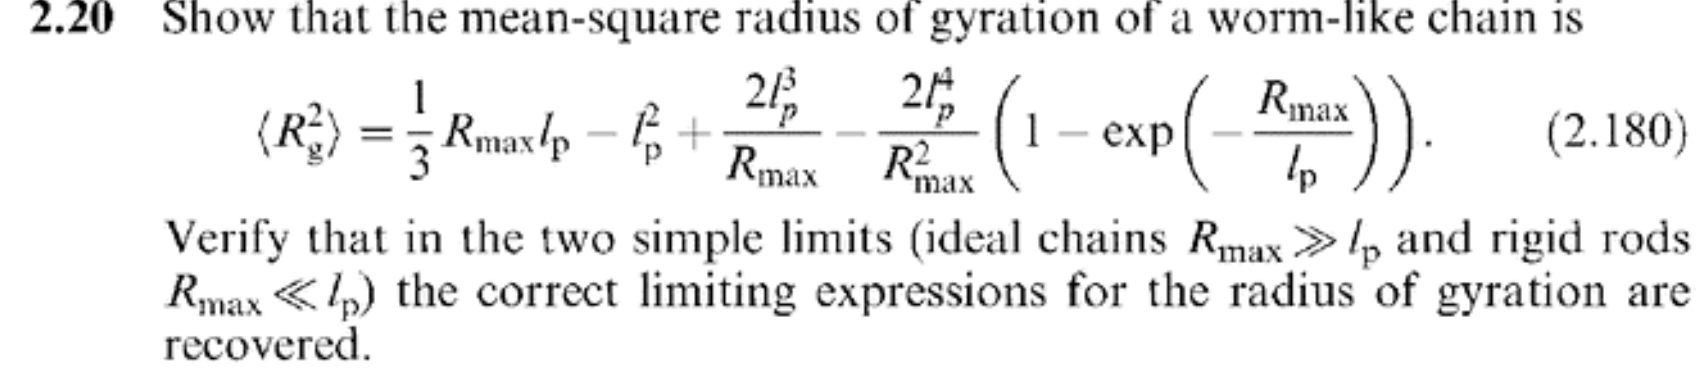

 # The integral to evaluate can be considered as the following, setting N == Rmax in the limits of integration and the constant factor
 
 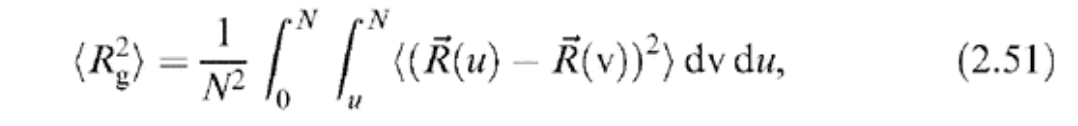

# To evaluate the integral, we'll replace the integrand with the expression for the mean-square end to end distance and set Rmax == u-v.
# Importantly, we note that the substitution for Rmax is done in the integrand and NOT in the limits of integration


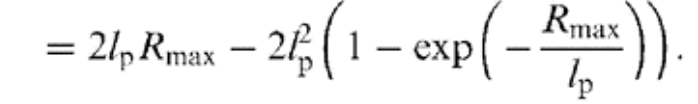

In [3]:
a = sp.Symbol('a', positive = True)
u = sp.Symbol("u")
v = sp.Symbol("v")
Lp = sp.Symbol("Lp", positive = True)
Rmax = sp.Symbol("Rmax", positive = True)
integrand = (2*Lp*(u-v) - 2*sp.Pow(Lp,2)*(1 - sp.exp(-((u-v)/Lp))))*(1/sp.Pow(Rmax,2))
result = sp.simplify(sp.integrate(integrand, (u, v, Rmax), (v, 0, Rmax)))
print("Here's our integral")
display(sp.Integral(integrand, (u, v, Rmax), (v, 0, Rmax)))
print("Here's our factored result")
result = sp.collect(result, ((2*sp.Pow(Lp, 4))/sp.Pow(Rmax,2)))
result

Here's our integral


Integral((-2*Lp**2*(1 - exp(-(u - v)/Lp)) + 2*Lp*(u - v))/Rmax**2, (u, v, Rmax), (v, 0, Rmax))

Here's our factored result


2*Lp**4*(-1 + exp(-Rmax/Lp))/Rmax**2 + 2*Lp**3/Rmax - Lp**2 + Lp*Rmax/3


 # note that the negative sign is not factored with the 2Lp^4 term but the result is equivalent

 # For Rmax >> Lp we can use the following expression from the text book and proceed as before
 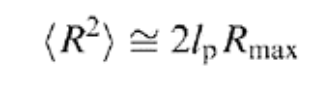

In [4]:
integrand_bigRmax = (2*Lp*(u-v))*(1/sp.Pow(Rmax,2))
result_bigRmax = sp.simplify(sp.integrate(integrand_bigRmax, (u, v, Rmax), (v, 0, Rmax)))
print("Here's the integral")
display(sp.Integral(integrand_bigRmax, (u, v, Rmax), (v, 0, Rmax)))
print("""Here's the result, which is, by definition, equivalent to <R^2>/6
if we plug in the above definition for <R^2> (shown in the cell above)""")
result_bigRmax

Here's the integral


Integral(2*Lp*(u - v)/Rmax**2, (u, v, Rmax), (v, 0, Rmax))

Here's the result, which is, by definition, equivalent to <R^2>/6
if we plug in the above definition for <R^2> (shown in the cell above)


Lp*Rmax/3

 # For Rmax << Lp we can use the following expression from the text book and proceed similarly as before with a few exceptions....
 
 # 1) we'll replace Rmax == (u-Rmax/2) in the expression for <R^2>
 
 # 2) we'll integrate over u only from 0 to Rmax and the constant factor outside the integral will be just 1/Rmax
 
 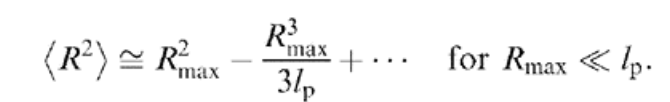

In [5]:
integrand_bigLp = (sp.Pow((u-(Rmax/2)), 2) - sp.Pow((u-(Rmax/2)), 3)/(3*Lp))*(1/sp.Pow(Rmax,1))
result_bigLp = sp.simplify(sp.integrate(integrand_bigLp, (u, 0, Rmax)))
print("Here's the integral")
display(sp.Integral(integrand_bigLp, (u, 0, Rmax)))
print("Here's the result")
result_bigLp

Here's the integral


Integral(((-Rmax/2 + u)**2 - (-Rmax/2 + u)**3/(3*Lp))/Rmax, (u, 0, Rmax))

Here's the result


Rmax**2/12

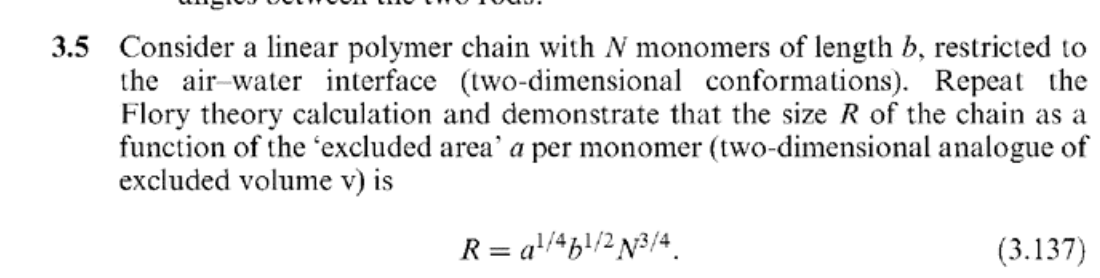

In [6]:
Kb = sp.Symbol("Kb", positive = True)
T = sp.Symbol("T", positive = True)
R = sp.Symbol("R", positive = True) #end to end distance
N = sp.Symbol("N", positive = True) #No. monomers
b = sp.Symbol("b", positive = True) #len monomers
a = sp.Symbol("a", positive = True) #excluded area
F,S,E = sp.symbols("F, S, E") #sybols to represent free energy and it's components
Entropic_contribution = Kb*T*(sp.Pow(R,2)/(N*sp.Pow(b,2)))
print("Entropic Contribution")
display(sp.Eq(S,Entropic_contribution))
Energetic_contribution = Kb*T*a*(sp.Pow(N,2)/sp.Pow(R,2))
print("Energetic Contribution")
display(sp.Eq(E,Energetic_contribution))
Free_energy = Entropic_contribution + Energetic_contribution
print("Total Free Energy")
display(sp.Eq(F,Free_energy))
dfdr = Free_energy.diff(R)
print("derivative of Free Energy w.r.t R")
display(sp.Eq(sp.Derivative(F,R),dfdr))
Rsoln = sp.solve(dfdr, R)
print("Solution for R")
display(sp.Eq(R,Rsoln[0]))

Entropic Contribution


Eq(S, Kb*R**2*T/(N*b**2))

Energetic Contribution


Eq(E, Kb*N**2*T*a/R**2)

Total Free Energy


Eq(F, Kb*N**2*T*a/R**2 + Kb*R**2*T/(N*b**2))

derivative of Free Energy w.r.t R


Eq(Derivative(F, R), -2*Kb*N**2*T*a/R**3 + 2*Kb*R*T/(N*b**2))

Solution for R


Eq(R, N**(3/4)*a**(1/4)*sqrt(b))

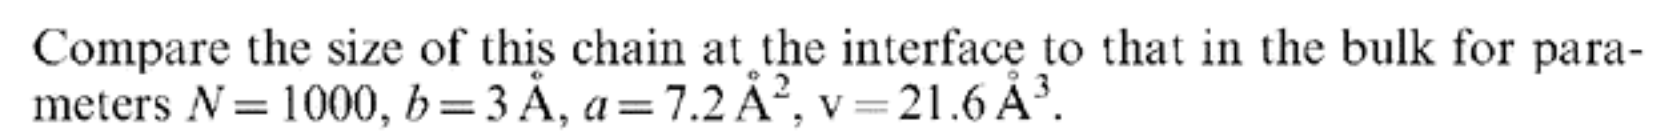

In [7]:
R_interface = np.power(1000, (3/4))*np.power(7.2,(1/4))*np.sqrt(3)
print(f"Size at interface : ~ {R_interface} ang")
R_bulk = np.power(21.6, (1/5))*np.power(3, (2/5))*np.power(1000, (3/5))
print(f"Size in bulk : ~ {R_bulk} ang")

Size at interface : ~ 504.53784915222866 ang
Size in bulk : ~ 181.02529009635487 ang


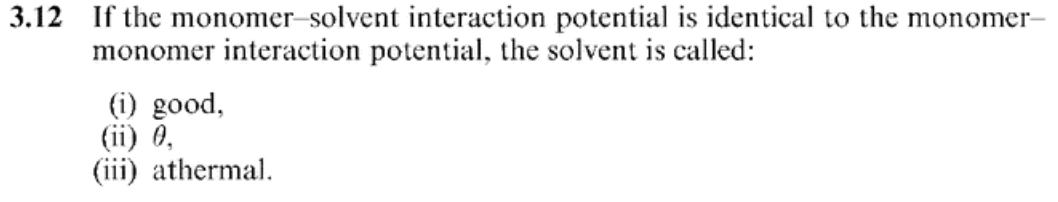

 # Answer: athermal solvent
 
 # In an athermal solvent, the monomer-solvent energetic interaction is identical to the monomer-monomer interaction. This makes the net interaction between monomers zero, leaving only the hard core repulsion between monomers. The excluded volume is independent of the temperature (v~b^3) and the chain is a self-avoiding walk of monomers (Rubinstein and Colby).
 
 # We also have the following relations...

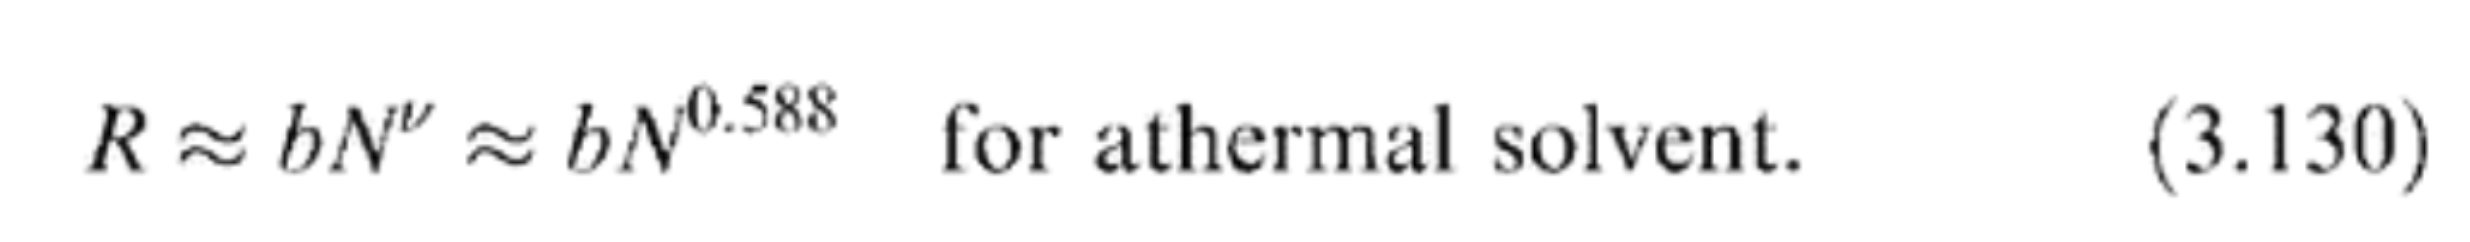

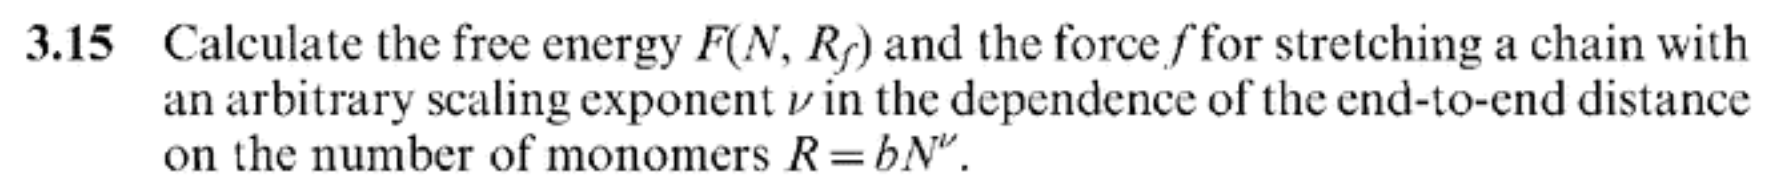

 # In order to prevent overwriting variable names, to solve this problem, I will call R (as used in the book's final expression) == Rf (stretch end to end)
 # additionally, I will call the unstretched length RF
 
 # also note that sympy defaults to ordering v-1 rather than -(1-v) or vice versa, as far as I know, I cannot change this behavior. Please mind the ordering of terms, here.
 # For example, the computed expression for the force comes out as negative as a consequence of this behavior, however, the expression is still analytically correct! (this is because sympy will always write (v-1) and adjust signs accordingly such that the expression is still true but can look peculiar)

In [11]:
##define variables
v = sp.Symbol(r"\nu", positive = True) #scaling parameter
z = sp.Symbol(r"\xi", positive = True) #len blob
g = sp.Symbol("g", positive = True) #monnmers/blob
RF = sp.Symbol("RF", positive = True) #resting or default end to end
Rf = sp.Symbol("Rf", positive = True) #stetch end to end
##define equations
print("Equations and substitutions")
z_eq1 = b*sp.Pow(g,v)
display(sp.Eq(z,z_eq1))
RF_eq1 = b*sp.Pow(N,v)
display(sp.Eq(RF, RF_eq1))
##apply manipulations
Rf_eq1 = sp.simplify(z*N/(sp.solve(z-z_eq1,g)[0]))
display(sp.Eq(Rf,Rf_eq1))
Rf_eq2 = sp.simplify(Rf_eq1.subs(N,sp.solve(RF-RF_eq1, N)[0]))
display(sp.Eq(Rf,Rf_eq2))
z_eq2 = sp.powsimp(sp.simplify(sp.solve(Rf-Rf_eq2, z)[0]))
display(sp.Eq(z,sp.powsimp(z_eq2)))
Free_energy_eq1 = sp.simplify(Kb*T*(Rf/z).subs(z,z_eq2))
display(sp.Eq(F,Free_energy_eq1))
print("Final Solutions\n")
print("NOTE that the numerator and denomenator are flipped in the expression for free energy\n\
because the exponent is 1/(v-1) rather than -1/(1-v) in which the -1 gets distributed to the\n\
exponentiated quotient and flips it")
Free_energy_final = sp.simplify(Free_energy_eq1.subs(RF,RF_eq1))
display(sp.Eq(F,Free_energy_final))
print("NOTE that the force comes out with a negative sign in front because the\n\
denomenator is written with a factor of (v-1) rather than -(1-v)\n")
print("FORCE is the derivative of free energy w.r.t Rf, here")
Force = sp.powsimp(Free_energy_final.diff(Rf))
display(sp.Eq(sp.Derivative(F,Rf),Force))


Equations and substitutions


Eq(\xi, b*g**\nu)

Eq(RF, N**\nu*b)

Eq(Rf, N*\xi**((\nu - 1)/\nu)*b**(1/\nu))

Eq(Rf, RF**(1/\nu)*\xi**((\nu - 1)/\nu))

Eq(\xi, Rf**(\nu/(\nu - 1))/RF**(1/(\nu - 1)))

Eq(F, Kb*T*(RF/Rf)**(1/(\nu - 1)))

Final Solutions

NOTE that the numerator and denomenator are flipped in the expression for free energy
because the exponent is 1/(v-1) rather than -1/(1-v) in which the -1 gets distributed to the
exponentiated quotient and flips it


Eq(F, Kb*T*(N**\nu*b/Rf)**(1/(\nu - 1)))

NOTE that the force comes out with a negative sign in front because the
denomenator is written with a factor of (v-1) rather than -(1-v)

FORCE is the derivative of free energy w.r.t Rf, here


Eq(Derivative(F, Rf), -Kb*T*(N**\nu*b/Rf)**(1/(\nu - 1))/(Rf*(\nu - 1)))